<IPython.core.display.Javascript object>


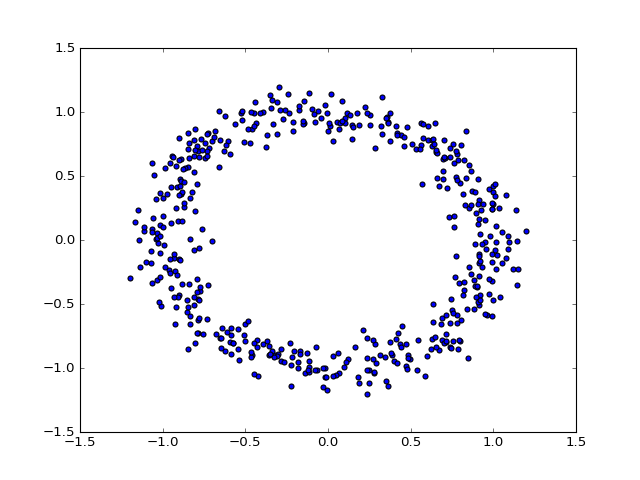

In [8]:
%matplotlib notebook

import matplotlib.pyplot as plt
from TopologyFunctionality.Startup import Startup
from TopologyFunctionality.Helper import TimeDelayEmbeddingUtil as tde
from TopologyFunctionality.Helper import OctreeUtil as ou
from TopologyFunctionality.Octree import Octree
import numpy as np

class Image(object):
    
    def __init__(self,fig,ax):
        self.fig = fig
        self.ax = ax
        self.wave = np.array(Startup())
        self.waveStart = 0
        self.waveEnd = tde.getWaveEnd(self.waveStart)
        self.waveLength = self.wave.size
        [self.x,self.y, self.tauX] = tde.getPhaseData(self.wave, self.waveStart, self.waveEnd)
        self.ax.scatter(self.x,self.y)
        self.fig.canvas.draw()
        self.points = ou.getPointObjects(self.x,self.y)
        self.oct = Octree.Octree(3)
        self.oct.createOctree(self.points,True)

    def drawPlot(self, event):
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            self.slideWindow(5)
        elif event.key == 'p':
            self.slideWindow(-5)
        plt.cla()
        self.ax.scatter(self.x,self.y)
        self.fig.canvas.draw()

    def slideWindow(self, distance):
        if distance < 0 and self.waveStart==0:
            return
        elif distance>0 and self.waveEnd+distance>self.waveLength:
            return
        else:
            self.waveStart = self.waveStart+distance
            self.waveEnd = self.waveEnd+distance
            [self.x,self.y, self.tauX] = tde.getPhaseData(self.wave, self.waveStart, self.waveEnd)
    
if __name__ == '__main__':
    fig, ax = plt.subplots()
    image = Image(fig,ax)
    fig.canvas.mpl_connect('key_press_event',image.drawPlot)
    plt.show()

In [ ]:
%matplotlib notebook 
import numpy as np
class PointBrowser(object): """ Click on a point to select and highlight it -- the data that generated the point will be shown in the lower axes. Use the 'n' and 'p' keys to browse through the next and previous points """
    def __init__(self):
        self.lastind = 0

        self.text = ax.text(0.05, 0.95, 'selected: none',
                            transform=ax.transAxes, va='top')
        self.selected, = ax.plot([xs[0]], [ys[0]], 'o', ms=12, alpha=0.4,
                                 color='yellow', visible=False)

    def onpress(self, event):
        if self.lastind is None:
            return
        if event.key not in ('n', 'p'):
            return
        if event.key == 'n':
            inc = 1
        else:
            inc = -1

        self.lastind += inc
        self.lastind = np.clip(self.lastind, 0, len(xs) - 1)
        self.update()

    def onpick(self, event):

        if event.artist != line:
            return True

        N = len(event.ind)
        if not N:
            return True

        # the click locations
        x = event.mouseevent.xdata
        y = event.mouseevent.ydata

        distances = np.hypot(x - xs[event.ind], y - ys[event.ind])
        indmin = distances.argmin()
        dataind = event.ind[indmin]

        self.lastind = dataind
        self.update()

    def update(self):
        if self.lastind is None:
            return

        dataind = self.lastind

        ax2.cla()
        ax2.plot(X[dataind])

        ax2.text(0.05, 0.9, 'mu=%1.3f\nsigma=%1.3f' % (xs[dataind], ys[dataind]),
                 transform=ax2.transAxes, va='top')
        ax2.set_ylim(-0.5, 1.5)
        self.selected.set_visible(True)
        self.selected.set_data(xs[dataind], ys[dataind])

        self.text.set_text('selected: %d' % dataind)
        fig.canvas.draw()
        
if name == 'main': import matplotlib.pyplot as plt
    X = np.random.rand(100, 200)
    xs = np.mean(X, axis=1)
    ys = np.std(X, axis=1)

    fig, (ax, ax2) = plt.subplots(2, 1)
    ax.set_title('click on point to plot time series')
    line, = ax.plot(xs, ys, 'o', picker=5)  # 5 points tolerance

    browser = PointBrowser()

    fig.canvas.mpl_connect('pick_event', browser.onpick)
    fig.canvas.mpl_connect('key_press_event', browser.onpress)

    plt.show()